In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\mervi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_excel('glass.xlsx')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [6]:
df.shape

(214, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.duplicated().sum()

1

In [3]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(213, 10)

In [11]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
numerical = [
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe'
]

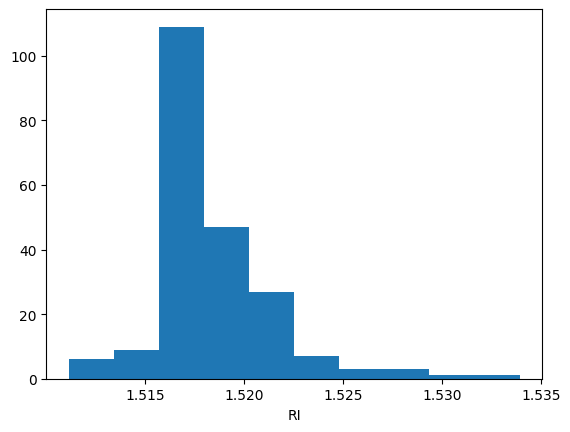

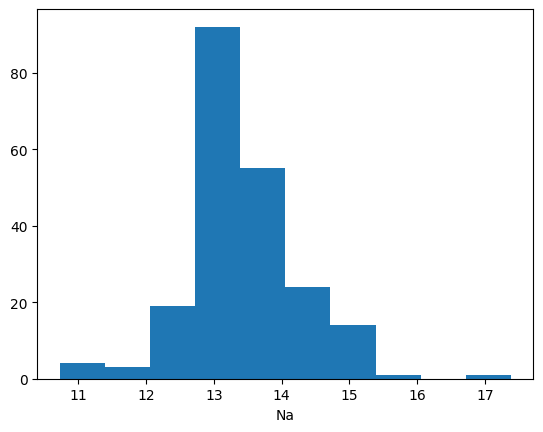

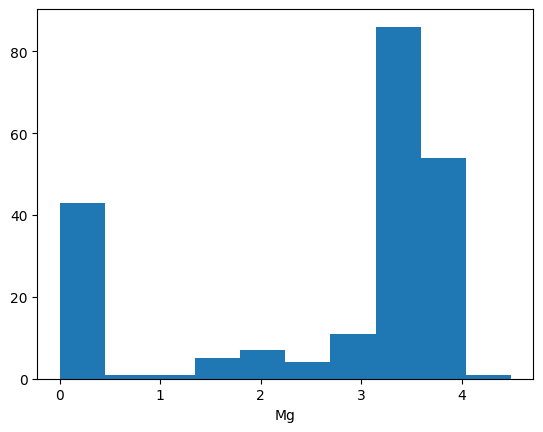

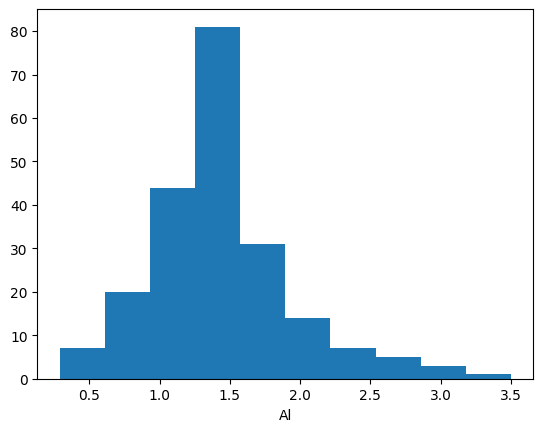

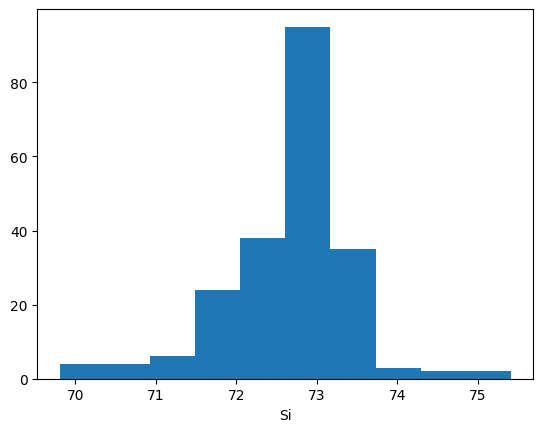

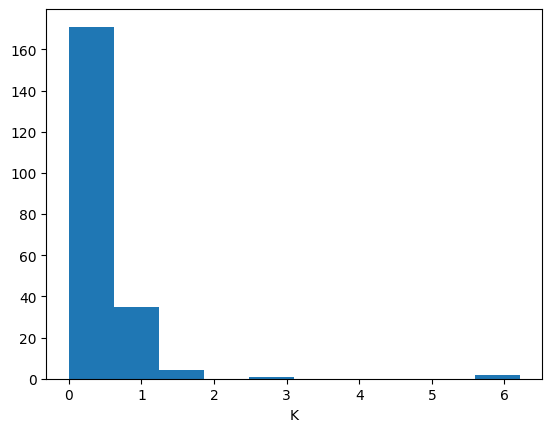

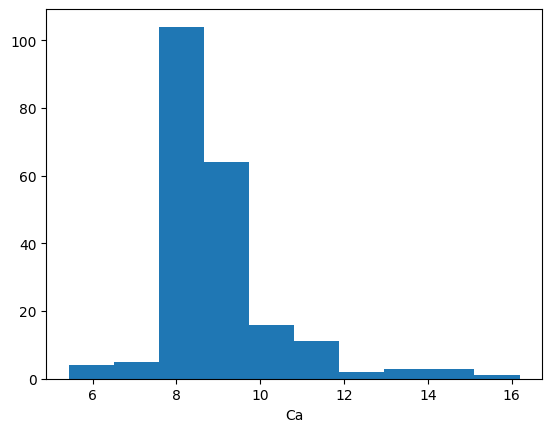

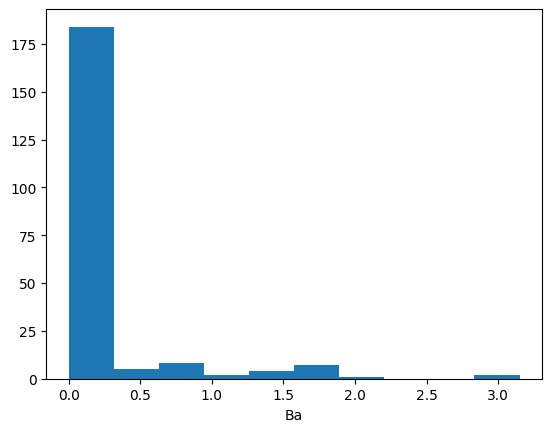

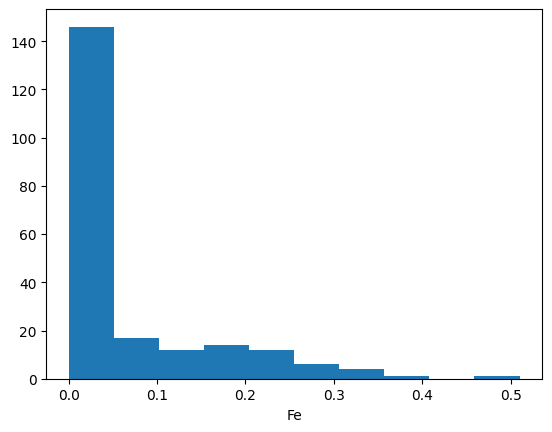

In [16]:
#look at numerical data distribution
for i in numerical:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.xticks()
    plt.show()

<Axes: >

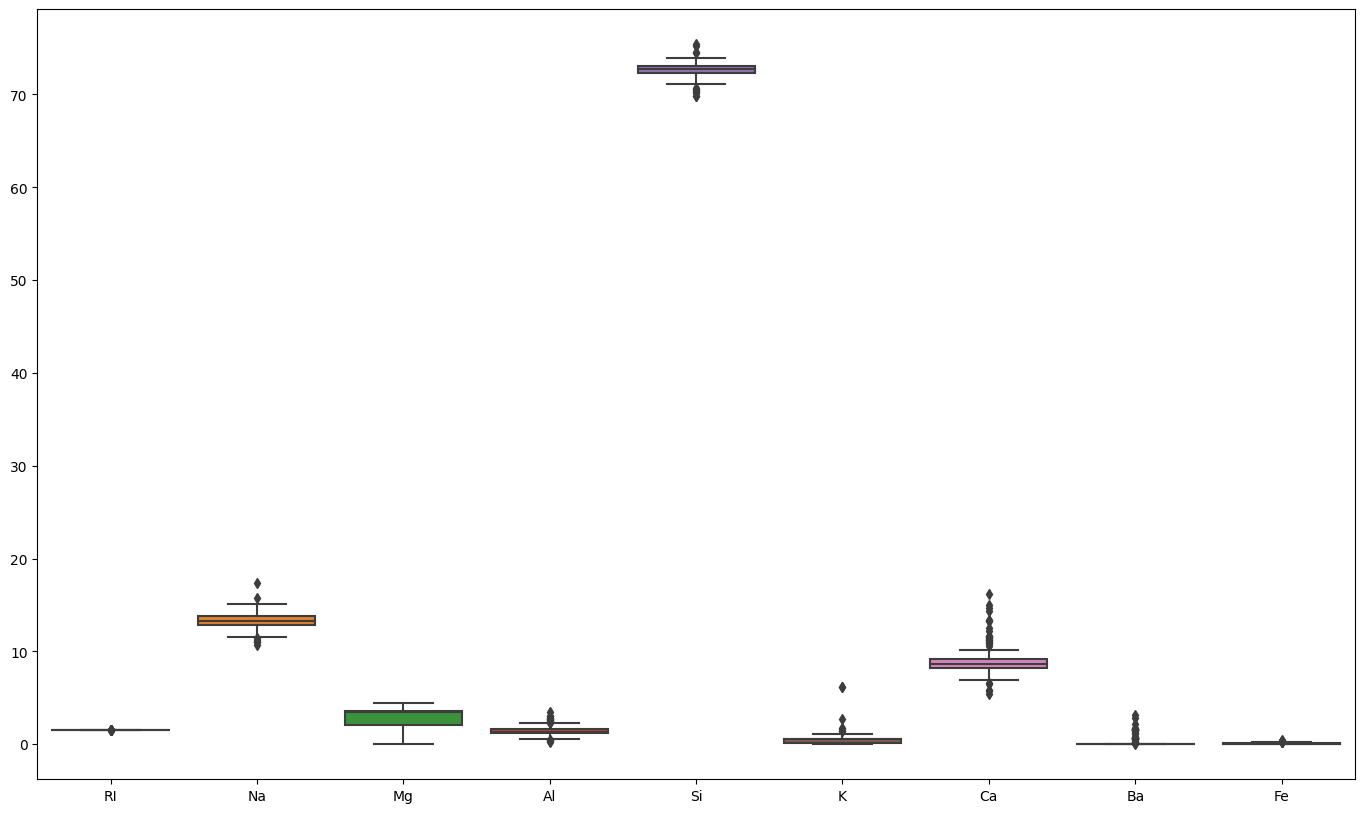

In [21]:
plt.figure(figsize=(17,10),)
sns.boxplot(df[numerical])

In [5]:
df['Type'].value_counts().sort_index()


Type
1    69
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

<BarContainer object of 6 artists>

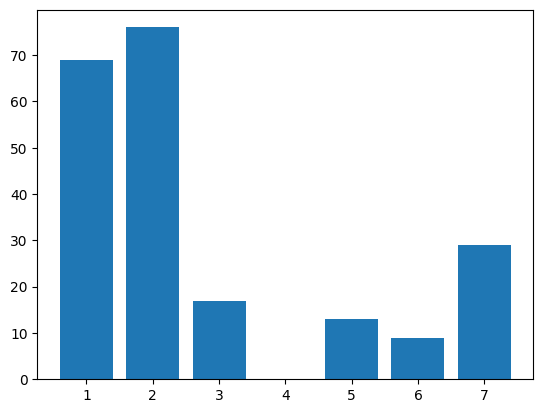

In [6]:
plt.bar(df['Type'].value_counts().sort_index().index,df['Type'].value_counts().sort_index().values)

In [8]:
corr=df[numerical].corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


<Axes: >

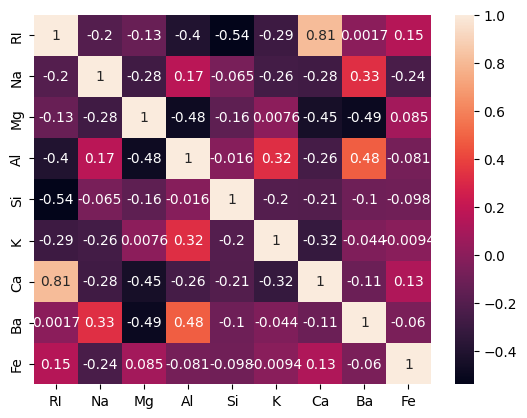

In [12]:
sns.heatmap(corr,annot=True)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
std=StandardScaler()

In [7]:
df[numerical]=std.fit_transform(df[numerical])

In [8]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7
210,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7
211,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7
212,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7


In [9]:
X=df[numerical]
Y=df['Type']

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
cls=RandomForestClassifier(n_estimators=50)

In [23]:
cls.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [24]:
y_pred=cls.predict(X_test)

In [25]:
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [26]:
accuracy_score(y_test,y_pred)

0.75

In [27]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.85      0.74        20
           2       0.77      0.80      0.78        25
           3       1.00      0.12      0.22         8
           5       1.00      0.50      0.67         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.75        64
   macro avg       0.85      0.71      0.70        64
weighted avg       0.79      0.75      0.72        64



In [28]:
### bagging method

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,bootstrap=True)

In [35]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [36]:
y_pred=bag.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.78125

In [38]:
## adaboost method

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
ada=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50)

In [41]:
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [42]:
y_pred=ada.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.734375

In [44]:
## gradient boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
grad=GradientBoostingClassifier(n_estimators=50,max_depth=5,learning_rate=0.3)

In [51]:
grad.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, n_estimators=50)

In [52]:
y_pred=grad.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.71875

Accuracy heirarchy is as follows

 Gradient boosting method <Adaboosting method < Random Forest classifier < Bagging method